# Análise de Dados - Netflix

Para esse Business Case, vamos utilizar uma base de dados disponibilizada pela Netflix.

Sua tarefa é utilizar os conhecimentos adquiridos até agora para responder as perguntas abaixo.

O arquivo da base de dados está dispnível para download e também no site Kaggle.

[Link da base de dados - Kaggle](https://www.kaggle.com/datasets/shivamb/netflix-shows)

# Carregamento e tratamento dos dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('netflix.csv', parse_dates=['date_added'])

In [7]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [8]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB


In [10]:
df_tratado = df.copy()

In [14]:
df_tratado.columns = ['id', 'tipo', 'titulo', 'diretor', 'elenco', 'pais', 'data_adicao_catalogo',
       'ano_lancamento', 'faixa_etaria', 'duracao', 'genero', 'sinopse']

In [15]:
df_tratado.head()

,id,tipo,titulo,diretor,elenco,pais,data_adicao_catalogo,ano_lancamento,faixa_etaria,duracao,genero,sinopse
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [17]:
df_tratado.tail()

,id,tipo,titulo,diretor,elenco,pais,data_adicao_catalogo,ano_lancamento,faixa_etaria,duracao,genero,sinopse
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


## 1 - Quantos registros e quantas colunas existem no dataset?

In [20]:
linhas, colunas = df_tratado.shape
print(f'Total de Linhas: {linhas}')
print(f'Total de Colunas: {colunas}')

Total de Linhas: 8807
Total de Colunas: 12


## 2- Existem colunas com valores ausentes? Quais?

Resposta: Sim!

Colunas: diretor, elenco, pais, data_adicao_catalogo, faixa_etaria, duracao

In [21]:
df_tratado.isna().sum()

id                         0
tipo                       0
titulo                     0
diretor                 2634
elenco                   825
pais                     831
data_adicao_catalogo      10
ano_lancamento             0
faixa_etaria               4
duracao                    3
genero                     0
sinopse                    0
dtype: int64

In [28]:
(df_tratado.isna().sum() / df.shape[0] * 100).round(2)

id                       0.00
tipo                     0.00
titulo                   0.00
diretor                 29.91
elenco                   9.37
pais                     9.44
data_adicao_catalogo     0.11
ano_lancamento           0.00
faixa_etaria             0.05
duracao                  0.03
genero                   0.00
sinopse                  0.00
dtype: float64

## 3 - Quantas séries (TV Show) e quantos filmes (Movie) estão disponíveis?

In [29]:
df_tratado.head()

,id,tipo,titulo,diretor,elenco,pais,data_adicao_catalogo,ano_lancamento,faixa_etaria,duracao,genero,sinopse
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [32]:
df_tratado['tipo'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [33]:
df_tratado['tipo'].value_counts()

tipo
Movie      6131
TV Show    2676
Name: count, dtype: int64

In [35]:
(df_tratado['tipo'].value_counts(normalize=True) * 100).round(2)

tipo
Movie      69.62
TV Show    30.38
Name: proportion, dtype: float64

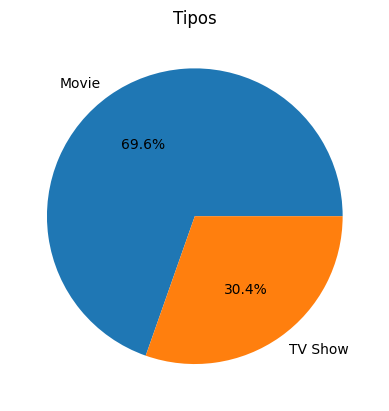

In [40]:
df_tratado['tipo'].value_counts().plot(kind='pie', title='Tipos', ylabel='', autopct='%1.1f%%');

## 4 - Quantos registros no dataset estão sem o país especificado? Liste os seus tipos (filme ou série de tv) e quantidades.

In [41]:
df_tratado.head()

,id,tipo,titulo,diretor,elenco,pais,data_adicao_catalogo,ano_lancamento,faixa_etaria,duracao,genero,sinopse
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [50]:
df_sem_pais = df_tratado.loc[df_tratado['pais'].isna()]

In [52]:
df_sem_pais['tipo'].value_counts()

tipo
Movie      440
TV Show    391
Name: count, dtype: int64

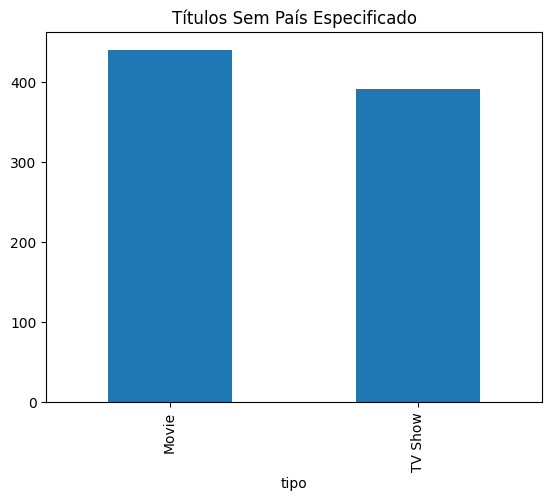

In [61]:
df_sem_pais['tipo'].value_counts().plot(kind='bar', title='Títulos Sem País Especificado');

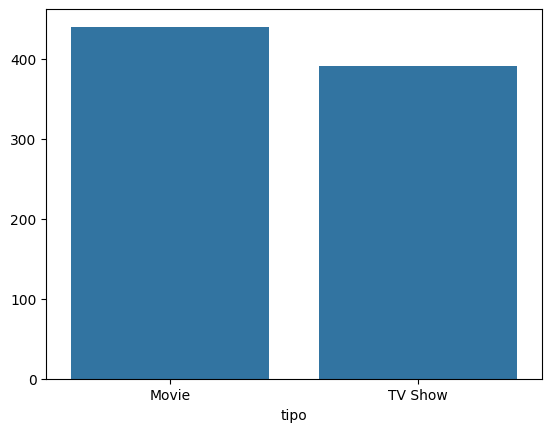

In [63]:
sns.barplot(x=df_sem_pais['tipo'].value_counts().index, y=df_sem_pais['tipo'].value_counts().values);

## 5 - Qual a data do primeiro filme disponibilizado e qual o seu título e país?

Resposta: O primeiro filmes foi disponibilizado em 01-01-2008. Seu título é: To and From Ney York. País de origme: Estados Unidos

In [64]:
df_tratado.head()

,id,tipo,titulo,diretor,elenco,pais,data_adicao_catalogo,ano_lancamento,faixa_etaria,duracao,genero,sinopse
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [67]:
df_movies = df_tratado.loc[df_tratado['tipo'] == 'Movie']

In [69]:
df_movies['data_adicao_catalogo'].min()

Timestamp('2008-01-01 00:00:00')

In [72]:
filtro = df_movies.loc[df_movies['data_adicao_catalogo'] == df_movies['data_adicao_catalogo'].min()]

In [73]:
filtro

,id,tipo,titulo,diretor,elenco,pais,data_adicao_catalogo,ano_lancamento,faixa_etaria,duracao,genero,sinopse
5957,s5958,Movie,To and From New York,Sorin Dan Mihalcescu,"Barbara King, Shaana Diya, John Krisiukenas, Y...",United States,2008-01-01,2006,TV-MA,81 min,"Dramas, Independent Movies, Thrillers","While covering a story in New York City, a Sea..."


## 6 - Qual o diretor com maior número de títulos (filme ou série)? Qual o seu país?

Resposta: Rajiv Chilaka. País: Índia

In [74]:
df_tratado.head()

,id,tipo,titulo,diretor,elenco,pais,data_adicao_catalogo,ano_lancamento,faixa_etaria,duracao,genero,sinopse
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [76]:
df_tratado['diretor'].value_counts()

diretor
Rajiv Chilaka                     19
Raúl Campos, Jan Suter            18
Marcus Raboy                      16
Suhas Kadav                       16
Jay Karas                         14
                                  ..
Raymie Muzquiz, Stu Livingston     1
Joe Menendez                       1
Eric Bross                         1
Will Eisenberg                     1
Mozez Singh                        1
Name: count, Length: 4528, dtype: int64

In [79]:
df_tratado.loc[df_tratado['diretor'] == 'Rajiv Chilaka']

,id,tipo,titulo,diretor,elenco,pais,data_adicao_catalogo,ano_lancamento,faixa_etaria,duracao,genero,sinopse
406,s407,Movie,Chhota Bheem - Neeli Pahaadi,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",NaN,2021-07-22,2013,TV-Y7,64 min,Children & Family Movies,Things get spooky when Bheem and his buddies t...
407,s408,Movie,Chhota Bheem & Ganesh,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",NaN,2021-07-22,2009,TV-Y7,68 min,Children & Family Movies,Bheem and Lord Ganesha join forces to save Dho...
408,s409,Movie,Chhota Bheem & Krishna: Mayanagari,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",NaN,2021-07-22,2011,TV-Y7,67 min,Children & Family Movies,Young lord Krishna has fallen for demoness Maa...
409,s410,Movie,Chhota Bheem & Krishna: Pataliputra- City of t...,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",NaN,2021-07-22,2010,TV-Y7,66 min,Children & Family Movies,Krishna needs Bheem’s help: The ruined city of...
410,s411,Movie,Chhota Bheem And The Broken Amulet,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",India,2021-07-22,2013,TV-Y7,64 min,Children & Family Movies,When a stranger tries to steal an amulet from ...
411,s412,Movie,Chhota Bheem And The Crown of Valhalla,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",NaN,2021-07-22,2013,TV-Y7,64 min,Children & Family Movies,To save the kingdom of Valhalla from invasion ...
412,s413,Movie,Chhota Bheem and the Incan Adventure,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",NaN,2021-07-22,2013,TV-Y7,65 min,Children & Family Movies,"When Dholakpur’s princess is kidnapped, Bheem ..."
413,s414,Movie,Chhota Bheem and The ShiNobi Secret,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",NaN,2021-07-22,2013,TV-Y7,64 min,Children & Family Movies,After learning of a samurai village under thre...
414,s415,Movie,Chhota Bheem Aur Hanuman,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",NaN,2021-07-22,2012,TV-Y7,68 min,Children & Family Movies,When two evil entities kidnap a princess in a ...
415,s416,Movie,Chhota Bheem aur Krishna,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",India,2021-07-22,2009,TV-Y7,68 min,Children & Family Movies,"Centuries after the end of a conqueror's rule,..."


## 7 - Qual é o filme de maior duração? E o de menor duração?

In [127]:
df_mv_tratada = df_tratado.query("tipo == 'Movie'").copy()

In [128]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [129]:
df_mv_tratada['duracao']

0        90 min
6        91 min
7       125 min
9       104 min
12      127 min
         ...   
8801     96 min
8802    158 min
8804     88 min
8805     88 min
8806    111 min
Name: duracao, Length: 6131, dtype: object

In [130]:
df_mv_tratada.loc[df_mv_tratada['duracao'].isna()]

,id,tipo,titulo,diretor,elenco,pais,data_adicao_catalogo,ano_lancamento,faixa_etaria,duracao,genero,sinopse
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


In [131]:
df_mv_tratada.loc[[5541, 5794, 5813], 'duracao'] = ['74 min', '84 min', '66 min']

In [132]:
df_mv_tratada.loc[[5541, 5794, 5813]]

,id,tipo,titulo,diretor,elenco,pais,data_adicao_catalogo,ano_lancamento,faixa_etaria,duracao,genero,sinopse
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,84 min,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,66 min,66 min,Movies,The comic puts his trademark hilarious/thought...


In [133]:
df_mv_tratada.loc[[5541, 5794, 5813], 'faixa_etaria'] = np.nan

In [134]:
df_mv_tratada.loc[[5541, 5794, 5813]]

,id,tipo,titulo,diretor,elenco,pais,data_adicao_catalogo,ano_lancamento,faixa_etaria,duracao,genero,sinopse
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,NaN,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,NaN,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,NaN,66 min,Movies,The comic puts his trademark hilarious/thought...


In [135]:
df_mv_tratada['duracao_min'] = df_mv_tratada['duracao'].str.replace(' min', '').astype(np.int64)

In [136]:
df_mv_tratada.head()

,id,tipo,titulo,diretor,elenco,pais,data_adicao_catalogo,ano_lancamento,faixa_etaria,duracao,genero,sinopse,duracao_min
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,91
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",125
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,104
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,127


In [137]:
df_mv_tratada['duracao_min'].sort_values(ascending=False)

4253    312
717     273
2491    253
2487    237
2484    233
       ... 
3535     10
1557      9
1484      8
2713      5
3777      3
Name: duracao_min, Length: 6131, dtype: int64

In [138]:
duracao_max = df_mv_tratada['duracao_min'].max()
duracao_min = df_mv_tratada['duracao_min'].min()
print(f'O filme de maior duração é o {duracao_max}')
print(f'O filme de menor duração é o {duracao_min}')


O filme de maior duração é o 312
O filme de menor duração é o 3


In [139]:
df_mv_tratada.query(f"duracao_min == {duracao_max}")

,id,tipo,titulo,diretor,elenco,pais,data_adicao_catalogo,ano_lancamento,faixa_etaria,duracao,genero,sinopse,duracao_min
4253,s4254,Movie,Black Mirror: Bandersnatch,NaN,"Fionn Whitehead, Will Poulter, Craig Parkinson...",United States,2018-12-28,2018,TV-MA,312 min,"Dramas, International Movies, Sci-Fi & Fantasy","In 1984, a young programmer begins to question...",312


In [140]:
df_mv_tratada.query(f"duracao_min == {duracao_min}")

,id,tipo,titulo,diretor,elenco,pais,data_adicao_catalogo,ano_lancamento,faixa_etaria,duracao,genero,sinopse,duracao_min
3777,s3778,Movie,Silent,"Limbert Fabian, Brandon Oldenburg",NaN,United States,2019-06-04,2014,TV-Y,3 min,"Children & Family Movies, Sci-Fi & Fantasy","""Silent"" is an animated short film created by ...",3


## 8 - Qual o tempo médio de duração de um filme?

Resposta: O tempo Médio de Duração de um filme é de 99 minutos

<Axes: xlabel='duracao_min'>

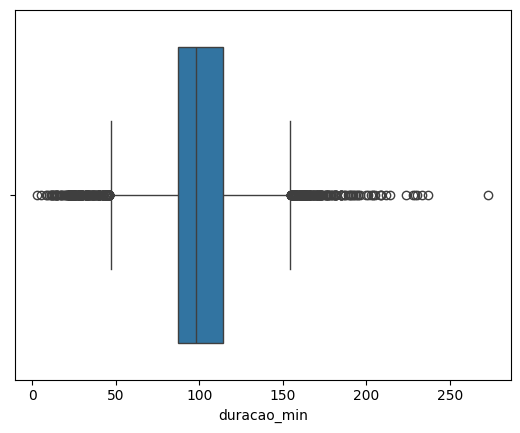

In [155]:
sns.boxplot(x=df_mv_tratada['duracao_min'])

In [154]:
df_mv_tratada['duracao_min'].sort_values(ascending=False)

717     273
2487    237
2484    233
2488    230
166     229
       ... 
3535     10
1557      9
1484      8
2713      5
3777      3
Name: duracao_min, Length: 6131, dtype: int64

In [152]:
df_mv_tratada.loc[4253, 'duracao_min'] = 90

In [153]:
df_mv_tratada.loc[4253]

id                                                                  s4254
tipo                                                                Movie
titulo                                         Black Mirror: Bandersnatch
diretor                                                               NaN
elenco                  Fionn Whitehead, Will Poulter, Craig Parkinson...
pais                                                        United States
data_adicao_catalogo                                  2018-12-28 00:00:00
ano_lancamento                                                       2018
faixa_etaria                                                        TV-MA
duracao                                                           312 min
genero                     Dramas, International Movies, Sci-Fi & Fantasy
sinopse                 In 1984, a young programmer begins to question...
duracao_min                                                            90
Name: 4253, dtype: object

In [156]:
df_mv_tratada['duracao_min'].describe().round(2)

count    6131.00
mean       99.49
std        28.11
min         3.00
25%        87.00
50%        98.00
75%       114.00
max       273.00
Name: duracao_min, dtype: float64

## 9 - Liste os 3 países que produzem a maior quantidade de Séries (TV Show).

Resposta: Os 3 Países que mais produzem séries de TV são:
    - Estados Unidos
    - Reino Unido
    - Japão

In [166]:
df_tratado.loc[df_tratado['tipo'] == 'TV Show', 'pais'].value_counts(dropna=True).head(3)

pais
United States     760
United Kingdom    213
Japan             169
Name: count, dtype: int64

## 10 - Em qual ano  temos o maior número de séries e filmes brasileiros disponibilizados na Netflix?

Resposta: O ano que o Brasil teve mais participações em Filmes e Séries foi em 2020

In [167]:
df_tratado.head()

,id,tipo,titulo,diretor,elenco,pais,data_adicao_catalogo,ano_lancamento,faixa_etaria,duracao,genero,sinopse
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [171]:
df_tratado['pais'].value_counts().sort_index()

pais
, France, Algeria                                       1
, South Korea                                           1
Argentina                                              56
Argentina, Brazil, France, Poland, Germany, Denmark     1
Argentina, Chile                                        2
                                                       ..
Venezuela                                               1
Venezuela, Colombia                                     1
Vietnam                                                 7
West Germany                                            1
Zimbabwe                                                1
Name: count, Length: 748, dtype: int64

In [180]:
df_tratado_brazil = df_tratado[df_tratado['pais'].notna() & df_tratado['pais'].str.contains('Brazil')].copy()

In [181]:
df_tratado_brazil.head()

,id,tipo,titulo,diretor,elenco,pais,data_adicao_catalogo,ano_lancamento,faixa_etaria,duracao,genero,sinopse
270,s271,Movie,Beckett,Ferdinando Cito Filomarino,"John David Washington, Boyd Holbrook, Alicia V...","Italy, Brazil, Greece",2021-08-13,2021,TV-MA,110 min,Action & Adventure,An American tourist goes on the run in Greece ...
302,s303,Movie,City of God: 10 Years Later,"Cavi Borges, Luciano Vidigal",NaN,Brazil,2021-08-05,2013,TV-MA,69 min,"Documentaries, International Movies","A decade after the seminal Brazilian film ""Cit..."
650,s651,Movie,O Vendedor de Sonhos,Jayme Monjardim,"César Troncoso, Dan Stulbach, Thiago Mendonça,...",Brazil,2021-06-22,2016,TV-14,96 min,"Dramas, International Movies",A disillusioned psychologist tries to commit s...
783,s784,Movie,Carnaval,Leandro Neri,"Giovana Cordeiro, Gkay, Bruna Inocencio, Samya...",Brazil,2021-06-02,2021,TV-MA,95 min,"Comedies, International Movies, Music & Musicals","After a breakup, an influencer takes her frien..."
894,s895,Movie,Dance of the Forty One,David Pablos,"Alfonso Herrera, Emiliano Zurita, Mabel Cadena...","Mexico, Brazil",2021-05-12,2021,TV-MA,99 min,"Dramas, Independent Movies, International Movies",A gay congressman marries the Mexican presiden...


In [187]:
df_tratado_brazil['data_adicao_catalogo'].dt.year.value_counts().head(1)

data_adicao_catalogo
2020    27
Name: count, dtype: int64

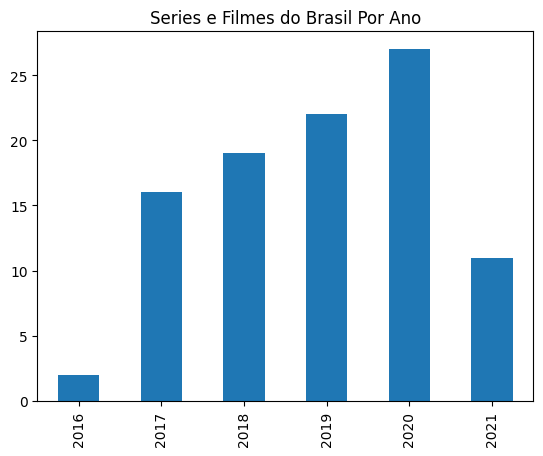

In [191]:
df_tratado_brazil['data_adicao_catalogo'].dt.year.value_counts().sort_index().plot(kind='bar', title='Series e Filmes do Brasil Por Ano', xlabel='');

## 11 - Qual(ais) o(s) diretor(es) brasileiro(s) com o maior número de títulos (filme/série)?

Resposta: Os diretores brasileiros com maior número de títulos são:
    - Lucas Margutti
    - Diego Pignataro

In [199]:
df_tratado_brazil['diretor'].value_counts().head()

diretor
Lucas Margutti        3
Diego Pignataro       3
Marcelo Galvão        2
Alexandre Avancini    2
Bruno Garotti         2
Name: count, dtype: int64

## 12 - Existem mais conteúdos para adultos ou para crianças e adolescentes?

Resposta: Existem mais conteúdos para crianças e adolescentes

In [200]:
df_tratado.head()

,id,tipo,titulo,diretor,elenco,pais,data_adicao_catalogo,ano_lancamento,faixa_etaria,duracao,genero,sinopse
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [204]:
df_tratado['faixa_etaria'].value_counts()

faixa_etaria
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64

In [210]:
adultos = ['TV-MA', 'R', 'NR', 'NC-17']
crianca_adolescente = ['TV-14', 'TV-PG', 'PG-13', 'TV-Y7', 'TV-Y', 'PG', 'TV-G', 'G', 'TV-Y7-FV']

In [218]:
adulto_plot = df_tratado.query("faixa_etaria in @adultos").shape[0]

In [219]:
crianca_plot = df_tratado.query("faixa_etaria in @crianca_adolescente").shape[0]

In [220]:
df_conteudos = pd.DataFrame({
    'Faixa Etária': ['Adultos', 'Crianças e Adolescentes'],
    'Quantidade': [adulto_plot, crianca_plot]
})

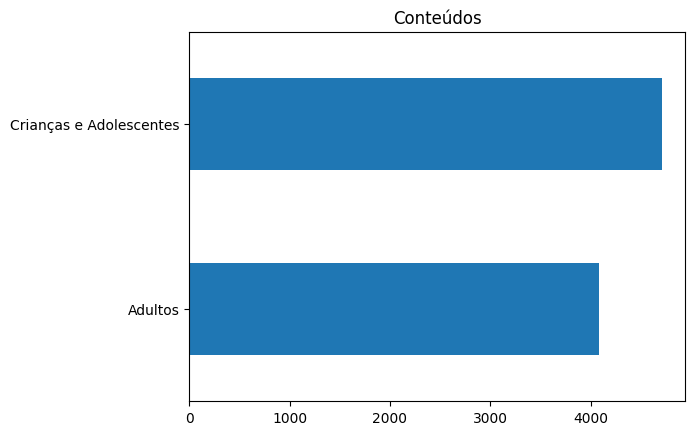

In [225]:
df_conteudos.plot(kind='barh', x='Faixa Etária', y='Quantidade', legend=False, title="Conteúdos", xlabel='', ylabel='');